
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [180]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### Filtrado de valores extremos y erroneos
Se consideran como extremos los valores de sueldos por encima del percentil 95 y por debajo del 5.

Luego se eliminan los resultados inválidos.

In [3]:
min_salary = df.salary_monthly_NETO.quantile(0.05)
max_salary = df.salary_monthly_NETO.quantile(0.95)

filter = df[(df['salary_monthly_NETO'] > min_salary) & (df['salary_monthly_NETO'] < max_salary)]

filter = filter[filter['tools_programming_languages'] != 'Ninguno']


### Gráfico para primera visualización de los datos

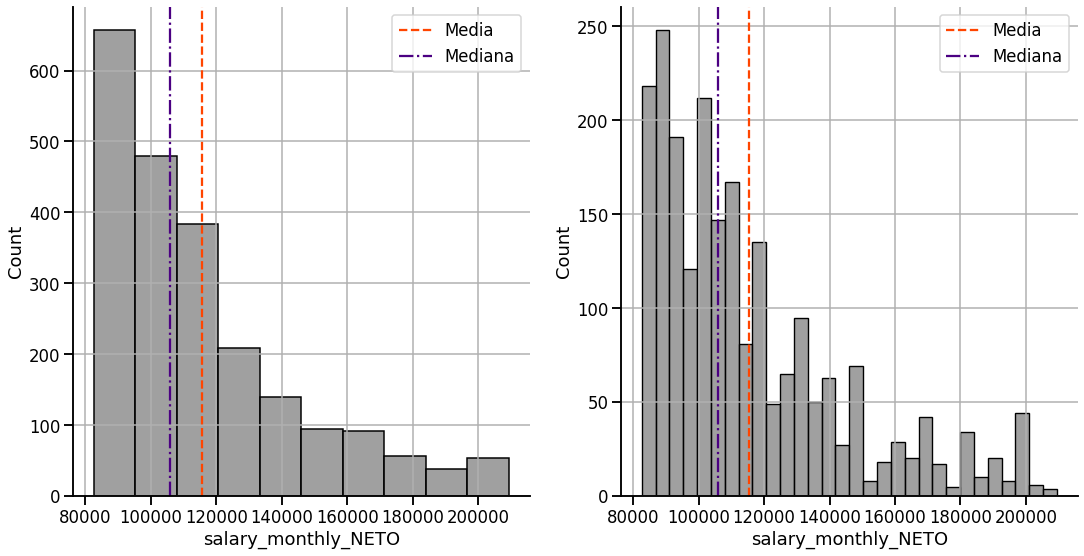

In [4]:
mean_smn = np.mean(filter.salary_monthly_NETO)
median_smn = np.median(filter.salary_monthly_NETO)

df_clean_rec_mean = filter[filter.salary_monthly_NETO > mean_smn]
df_clean_rec_median = filter[filter.salary_monthly_NETO > median_smn]


ncols = 2
figure1, axes = plt.subplots(1, ncols, figsize=(18, 9))
ax11, ax12 = axes.flatten()

sns.histplot(df_clean_rec_mean['salary_monthly_NETO'], bins=10, ax=ax11,
                stat='count', color='gray')  # histograma con 10 bins-.
ax11.axvline(df_clean_rec_mean['salary_monthly_NETO'].mean(),
                color='orangered', linestyle='--', label='Media')
ax11.axvline(df_clean_rec_mean['salary_monthly_NETO'].median(),
                color='indigo', linestyle='-.', label='Mediana')
sns.histplot(df_clean_rec_mean['salary_monthly_NETO'], bins=30, ax=ax12,
                stat='count', color='gray')  # histograma con 30 bins-.
ax12.axvline(df_clean_rec_mean['salary_monthly_NETO'].mean(),
                color='orangered', linestyle='--', label='Media')
ax12.axvline(df_clean_rec_mean['salary_monthly_NETO'].median(),
                color='indigo', linestyle='-.', label='Mediana')

ax11.legend()
ax12.legend()

ax11.grid()
ax12.grid()

sns.despine()

plt.show()

#### Conclusión
Aun habiendo eliminado los sueldos grandes (correspondientes solo al 5% de los datos), la media es mayor que la mediana, lo cual nos dice que la distribucion tiene una cola hacia valores grandes y no se corresponde a una distribucion normal.

### Se obtienen los lenguajes más populares

In [20]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Crear una columna nueva con la lista de lenguajes en lugar de un string
filter.loc[:, 'cured_programming_languages'] = filter.tools_programming_languages\
    .apply(split_languages)

# Se seleccionan los top 99 conjuntos de lenguajes más populares debido a que la grán mayoría de los casos son únicos tienen una sola ocurrencia.
language_count = filter.cured_programming_languages.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'cured_programming_languages': 'frequency'})

language_count = language_count[language_count['language'].astype(bool)]

language_count = language_count[language_count['frequency'] > language_count.frequency.quantile(0.99)]

freq_list = language_count['language'].to_list()

filter_top = filter[filter['cured_programming_languages'].isin(freq_list)].reset_index()

# Filtrado extra para eliminar algúnos valores con formato incorrecto
filter_top['tools_programming_languages'] = filter_top['tools_programming_languages'].replace('Python, Sql', 'Python, SQL').replace('SQL, Ninguno de los anteriores', 'SQL')


### Gráfica del top

[]

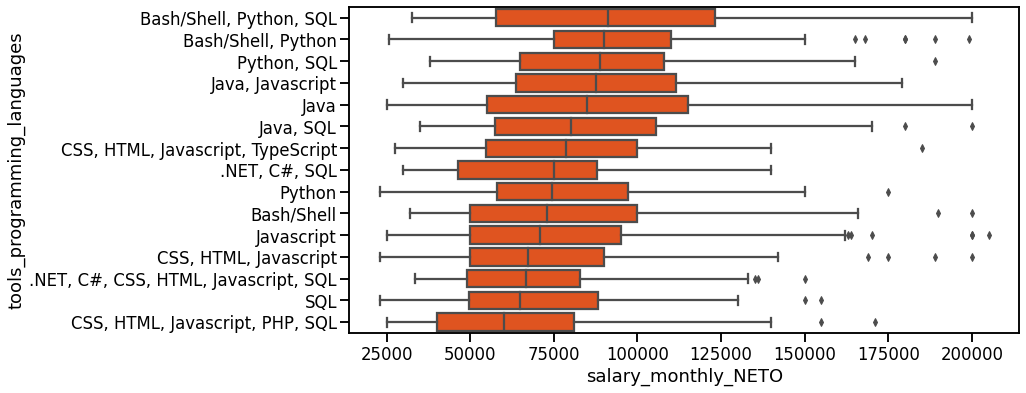

In [21]:
result = filter_top.groupby('tools_programming_languages')\
    ['salary_monthly_NETO'].\
    aggregate(np.median).\
    reset_index().sort_values('salary_monthly_NETO',
                              ascending=False)

plt.figure(figsize=(12, 6))
sns.boxplot(data=filter_top, x='salary_monthly_NETO', y='tools_programming_languages',
                color='orangered', order=result['tools_programming_languages'])
plt.ticklabel_format(style='plain', axis='x')
plt.plot()

### Medidas de la muestra

In [22]:
# Se obtienen medidas del data set

selected_columns_top = filter_top.filter(items=['salary_monthly_NETO', 'tools_programming_languages'])
tmp = selected_columns_top.groupby(['tools_programming_languages']).mean().round(2).rename(columns={'salary_monthly_NETO': "media"})
tmp.loc[:, 'mediana'] = selected_columns_top.groupby(['tools_programming_languages']).median().round(2).salary_monthly_NETO
tmp.loc[:, 'desviacion_std'] = selected_columns_top.groupby(['tools_programming_languages']).std().round(2).salary_monthly_NETO
tmp.loc[:, 'coef_var'] = ((tmp["desviacion_std"]/tmp["media"])*100).apply(lambda s: '{0:.2f}'.format(s))
tmp['coef_var'] = pd.to_numeric(tmp['coef_var'])
tmp = tmp.sort_values(by='media', ascending=False)
tmp = tmp.reset_index()
tmp

,tools_programming_languages,media,mediana,desviacion_std,coef_var
0,"Bash/Shell, Python, SQL",94895.21,91200.0,45119.09,47.55
1,"Bash/Shell, Python",94427.37,90000.0,32679.81,34.61
2,"Java, Javascript",90436.42,87500.0,36231.07,40.06
3,"Python, SQL",90147.38,88700.0,33682.20,37.36
4,Java,87705.75,84900.0,38956.73,44.42
5,"Java, SQL",84269.78,80000.0,35896.93,42.60
6,Python,79591.85,74500.0,28991.42,36.43
7,Javascript,78850.30,71000.0,38819.17,49.23
8,"CSS, HTML, Javascript, TypeScript",78661.17,78500.0,32225.82,40.97
9,Bash/Shell,78195.41,73000.0,35060.54,44.84


En esta tabla se pueden ver distintas medidas de los datos en el data frame.

Para casi todos los lenguajes se cumple que la media es mayor a la mediana. Esto nos indica que la curva que desriben estos datos tiene su pico por debajo de la media. Una gran dispersión por lo tanto, nos va a indicar que se trata de una curva más suave y por lo tanto con mayor posibilidad de obtener un salario elevado.


[Text(0, 0, 'Javascript'),
 Text(1, 0, 'CSS, HTML, Javascript, PHP, SQL'),
 Text(2, 0, 'Bash/Shell, Python, SQL'),
 Text(3, 0, 'CSS, HTML, Javascript'),
 Text(4, 0, 'Bash/Shell'),
 Text(5, 0, 'Java'),
 Text(6, 0, '.NET, C#, CSS, HTML, Javascript, SQL'),
 Text(7, 0, 'Java, SQL'),
 Text(8, 0, 'CSS, HTML, Javascript, TypeScript'),
 Text(9, 0, 'Java, Javascript'),
 Text(10, 0, 'SQL'),
 Text(11, 0, 'Python, SQL'),
 Text(12, 0, '.NET, C#, SQL'),
 Text(13, 0, 'Python'),
 Text(14, 0, 'Bash/Shell, Python')]

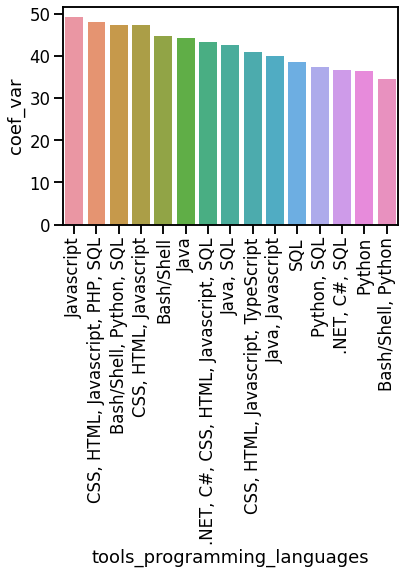

In [23]:
coef_var_order = tmp.sort_values(by='coef_var', ascending=False)

ax = sns.barplot(x="tools_programming_languages", y="coef_var", data=coef_var_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### Distribuciones de salario por lenguaje

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='tools_programming_languages'>

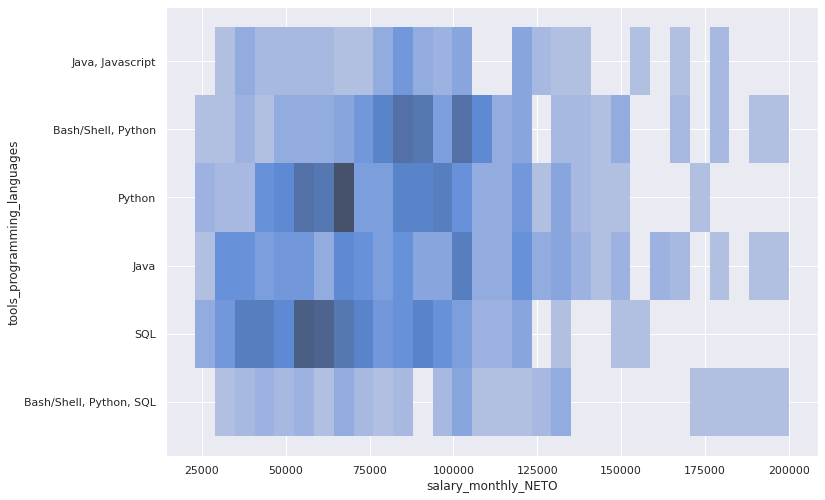

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Se seleccionaron algúnos lenguajes interesantes para graficar en base a las disperciones y valores mínimos o máximos de la media o mediana.
selected_lang = filter_top.loc[filter_top['tools_programming_languages'].isin(['SQL','Bash/Shell, Python, SQL','Python','Bash/Shell, Python','Java, Javascript','Java'])]
selected_lang
sns.histplot(selected_lang, x="salary_monthly_NETO", y="tools_programming_languages", element="poly", bins=30)

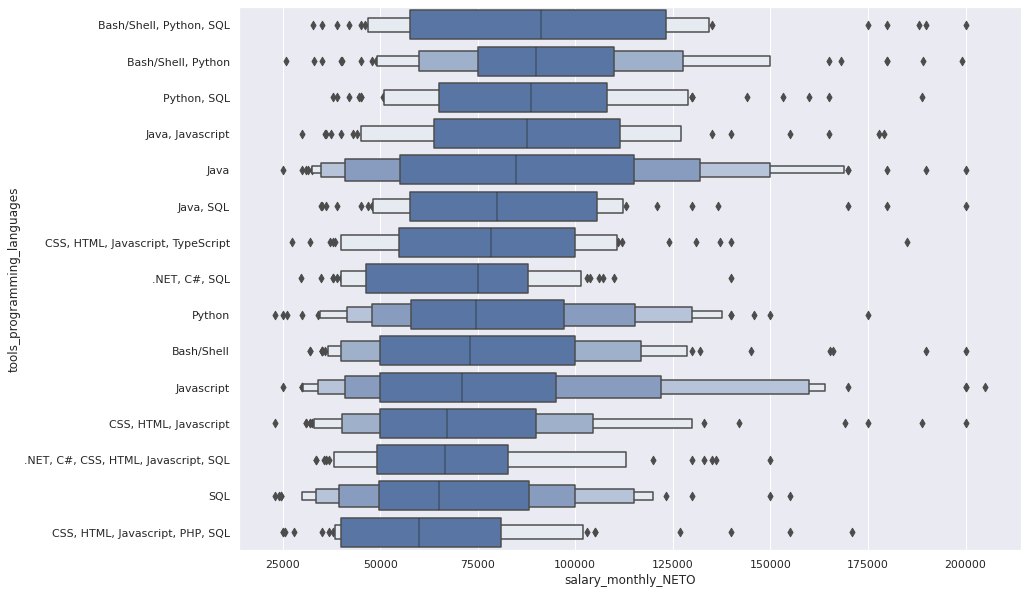

In [25]:
plt.figure(figsize = (14,10))
ax = sns.boxenplot(y="tools_programming_languages", x="salary_monthly_NETO",
              color="b", orient='h',
              scale="linear", data=filter_top,order=result['tools_programming_languages'])

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
